# Mental Health in Tech - Capstone Project (OpenLearn Cohort 1.0)
##  Day 1 - Data Cleaning & Exploratory Data Analysis (EDA)
By Krrish Baghla (24127025)

---
At first we will import all libraries , read the csv file , analyze it , remove anomalies(wrong data) and clean the dataset

### Importing Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


### Load and Preview the Dataset

In [2]:

df = pd.read_csv('mental_health_survey.csv')

print("Dataset loaded")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Display first 5 rows
df.head()


Dataset loaded
Shape: (1259, 27)
Columns: ['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Dataset Information and Summary

In [3]:

# General info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:

# Check for missing values
df.isnull().sum()


Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [5]:

# Basic statistics for numeric columns
df.describe()


,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


### Cleaning the Age Column

In [6]:

print("Min age before cleaning:", df['Age'].min())
print("Max age before cleaning:", df['Age'].max())

# Replace unrealistic age values with NaN
df.loc[df['Age'] < 18, 'Age'] = np.nan
df.loc[df['Age'] > 80, 'Age'] = np.nan

# Fill missing ages with median
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

print("New range:", df['Age'].min(), "to", df['Age'].max())


Min age before cleaning: -1726
Max age before cleaning: 99999999999
New range: 18.0 to 72.0


### Cleaning the Gender Column

In [7]:

# View gender values before cleaning
print(df['Gender'].value_counts())

# Normalize and simplify gender values
df['Gender'] = df['Gender'].str.lower()
df.loc[df['Gender'].str.contains('male|man|m', na=False), 'Gender'] = 'Male'
df.loc[df['Gender'].str.contains('female|woman|f', na=False), 'Gender'] = 'Female'
df.loc[~df['Gender'].isin(['Male', 'Female']), 'Gender'] = 'Other'

# Check cleaned values
df['Gender'].value_counts()


Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female                                              2
Female (trans)                                      2
Male-ish                                            1
Trans-female                                        1
Male (CIS)                                          1
Mal                  

Gender
Male      1192
Female      54
Other       13
Name: count, dtype: int64

In [8]:
df['Gender'] = df['Gender'].astype(str).str.lower().str.strip()

# Mapping known patterns to Male
male_keywords = ['male', 'm', 'man', 'cis male', 'msle', 'malr', 'maile', 'mal', 'guy', 'mail', 'make']
df.loc[df['Gender'].isin(male_keywords) | df['Gender'].str.contains(r'\b(male|man|guy|cis|mail)\b', na=False), 'Gender'] = 'Male'

# Mapping known patterns to Female
female_keywords = ['female', 'f', 'woman', 'cis female', 'cis-female', 'femake', 'femail', 'female (cis)', 'trans woman']
df.loc[df['Gender'].isin(female_keywords) | df['Gender'].str.contains(r'\b(female|woman|cis|femail)\b', na=False), 'Gender'] = 'Female'

# Everyone else is labeled as Other
df.loc[~df['Gender'].isin(['Male', 'Female']), 'Gender'] = 'Other'

# Display final result
print(df['Gender'].value_counts())


Gender
Male      1192
Female      54
Other       13
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13520\3219040927.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['Gender'].isin(male_keywords) | df['Gender'].str.contains(r'\b(male|man|guy|cis|mail)\b', na=False), 'Gender'] = 'Male'
C:\Users\HP\AppData\Local\Temp\ipykernel_13520\3219040927.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['Gender'].isin(female_keywords) | df['Gender'].str.contains(r'\b(female|woman|cis|femail)\b', na=False), 'Gender'] = 'Female'


### Handling Missing Values

In [9]:

for col in df.columns:
    if df[col].dtype == 'object':
        most_common = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
        df[col] = df[col].fillna(most_common)
    else:
        df[col] = df[col].fillna(df[col].median())

print("Total missing values after cleaning:", df.isnull().sum().sum())



Total missing values after cleaning: 0


### Age Analysis

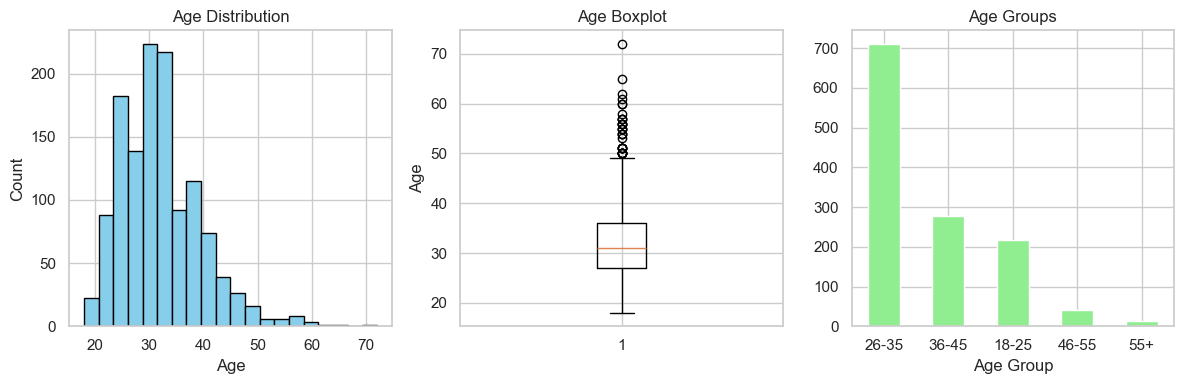

In [10]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.boxplot(df['Age'])
plt.title('Age Boxplot')
plt.ylabel('Age')

plt.subplot(1, 3, 3)
age_groups = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100], labels=['18-25', '26-35', '36-45', '46-55', '55+'])
age_groups.value_counts().plot(kind='bar', color='lightgreen')
plt.title('Age Groups')
plt.xlabel('Age Group')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


### Gender Analysis

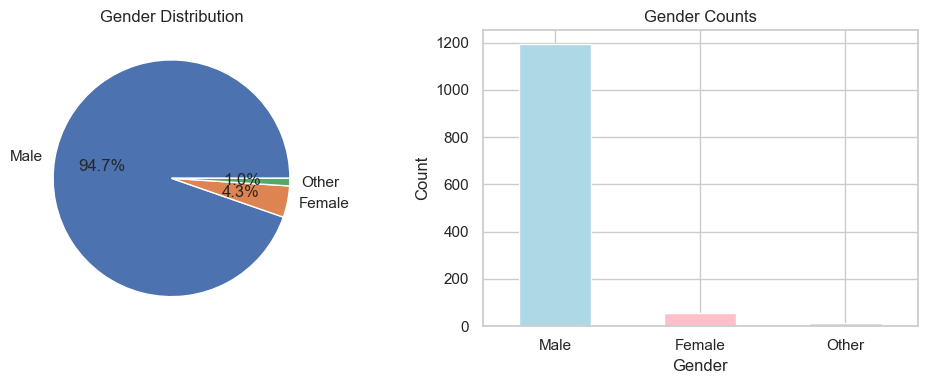

In [11]:

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
gender_counts.plot(kind='bar', color=['lightblue', 'pink', 'lightgray'])
plt.title('Gender Counts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


### Treatment Seeking Behavior

treatment
Yes    637
No     622
Name: count, dtype: int64


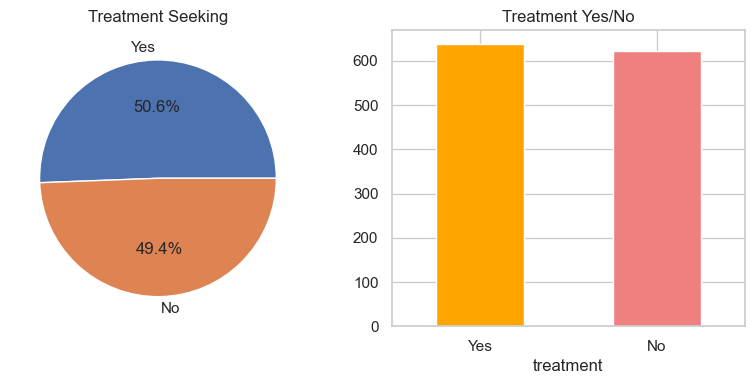

In [12]:

treatment_col = 'treatment'

if treatment_col in df.columns:
    print(df[treatment_col].value_counts())
    
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    treatment_counts = df[treatment_col].value_counts()
    plt.pie(treatment_counts.values, labels=treatment_counts.index, autopct='%1.1f%%')
    plt.title('Treatment Seeking')
    
    plt.subplot(1, 2, 2)
    treatment_counts.plot(kind='bar', color=['orange', 'lightcoral'])
    plt.title('Treatment Yes/No')
    plt.xticks(rotation=0)
    
    plt.tight_layout()
    plt.show()


### Age Distribution by Gender

C:\Users\HP\AppData\Local\Temp\ipykernel_13520\1626894227.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


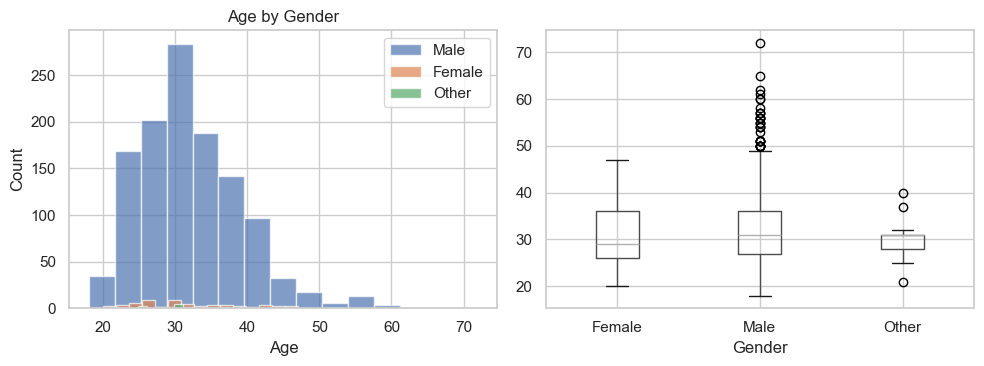

In [13]:

plt.figure(figsize=(10, 4), constrained_layout=True)

plt.subplot(1, 2, 1)
for gender in df['Gender'].unique():
    data = df[df['Gender'] == gender]['Age']
    plt.hist(data, alpha=0.7, label=gender, bins=15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age by Gender')
plt.legend()

plt.subplot(1, 2, 2)
df.boxplot(column='Age', by='Gender', ax=plt.gca())
plt.title('Age Distribution by Gender')
plt.title('')  # Remove second title
plt.suptitle('')  # Already removed the main title


plt.tight_layout()
plt.show()


### Gender vs Treatment

treatment   No  Yes
Gender             
Female      18   36
Male       603  589
Other        1   12


<Figure size 800x500 with 0 Axes>

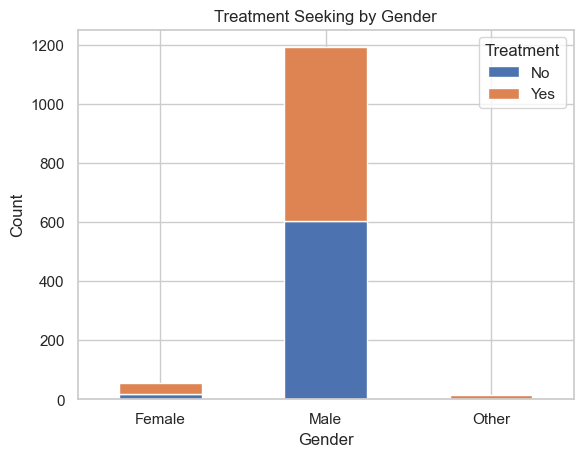

In [14]:

if treatment_col in df.columns:
    crosstab = pd.crosstab(df['Gender'], df[treatment_col])
    print(crosstab)
    
    plt.figure(figsize=(8, 5))
    crosstab.plot(kind='bar', stacked=True)
    plt.title('Treatment Seeking by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(title='Treatment')
    plt.show()


### Correlation Matrix for Numeric Columns

### Summary

In [15]:
print(df.columns.tolist())


['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']


In [16]:
df.columns = df.columns.str.strip().str.lower()  # Normalize

print("Total people surveyed:", len(df))
print("Average age:", round(df['age'].mean(), 1))

print("Gender breakdown:")
for gender, count in df['gender'].value_counts().items():
    print(f"  {gender}: {count} ({count/len(df)*100:.1f}%)")

if 'treatment' in df.columns:
    treatment_rate = df['treatment'].value_counts(normalize=True)
    print(f"Treatment seeking rate: {treatment_rate.get('Yes', 0)*100:.1f}%")


Total people surveyed: 1259
Average age: 32.1
Gender breakdown:
  Male: 1192 (94.7%)
  Female: 54 (4.3%)
  Other: 13 (1.0%)
Treatment seeking rate: 50.6%


In [17]:
df.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

### Save Cleaned Data

In [18]:

df.to_csv('mental_health_cleaned.csv', index=False)
print("Cleaned data saved as 'mental_health_cleaned.csv'")


Cleaned data saved as 'mental_health_cleaned.csv'
